In [1]:
# Import packages and functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Import dataset
badDrivers = pd.read_csv('bad-drivers.csv')

# Split off 20% of the data to be left out as test data
badDriversTrainingdata, testData = train_test_split(badDrivers, test_size=0.20)

# Store relevant columns as variables
X = badDriversTrainingdata[
    ['Losses incurred by insurance companies for collisions per insured driver ($)']
].values.reshape(-1, 1)
y = badDriversTrainingdata[['Car Insurance Premiums ($)']].values.reshape(-1, 1)

Text(0, 0.5, 'Car insurance premiums')

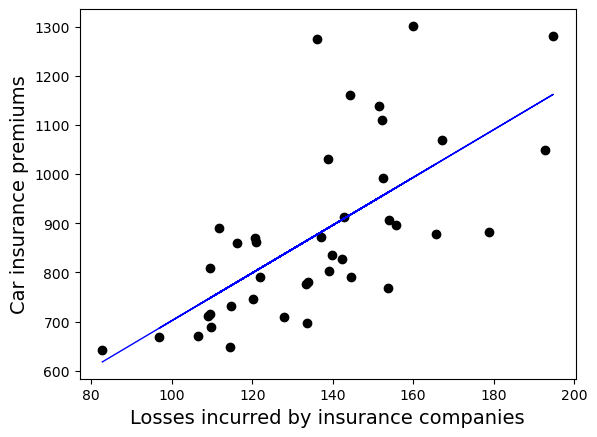

In [3]:
# Fit a linear model to the data
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Plot the fitted model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=1)
plt.xlabel('Losses incurred by insurance companies', fontsize=14)
plt.ylabel('Car insurance premiums', fontsize=14)

In [4]:
# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
ten_fold_scores = -cross_val_score(
    linModel, X, y, scoring='neg_mean_squared_error', cv=10
)

In [5]:
# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
LOOCV_scores = -cross_val_score(linModel, X, y, scoring='neg_mean_squared_error', cv=40)

([<matplotlib.axis.XTick at 0x1425be0b0>,
 [Text(0, 0, '10-fold'), Text(1, 0, 'LOOCV')])

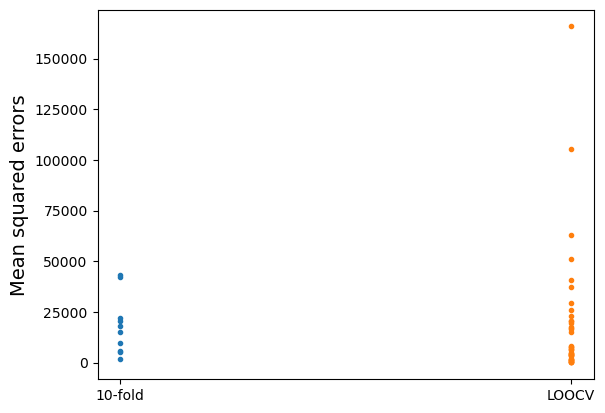

In [6]:
# Plot the errors for both scores
plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
plt.ylabel('Mean squared errors', fontsize=14)
plt.xticks([0, 1], ['10-fold', 'LOOCV'])